# Assignment 1: Principal Component Analysis
Karla Aniela Cepeda Zapata<br/>
Time Series Analysis<br/>
D00242569

### Q4
Load the “BodyFat” csv file from Moodle in to Python. The body fat data of consists of observations taken on a sample of 252 males. The following variables were measured:
* Percent body fat
* Age (years)
* Weight (pounds)
* Height (inches) 
* Neck circumference (cm) 
* Abdomen circumference (cm) 
* Knee circumference (cm) 
* Ankle circumference (cm)

#### Section A
1. Carry out a principal component analysis of the variables neck, abdomen, knee and ankle. Interpret the first component. What percentage of the variability in the dataset is accounted for by the first component?
2. Interpret the second component. What percentage of the variability in the dataset is accounted for by the second component? 
3. Examine the scree diagram and comment.
4. Plot the first two components. Identify any outliers.

In [151]:
# SETUP ENVIRONMENT
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats 
import math
from scipy.stats import pearsonr
from scipy.stats import spearmanr

os.chdir(r'E:\Karla\IRELAND v2\DKIT\2nd Semester\Time Series Analysis\CA\CA1')

pd.set_option('display.max_columns', None)

In [207]:
data = pd.read_csv('datasets/Bodyfat.csv')

In [208]:
# Change name of columns
data.columns = list(map(lambda s: s.lower().strip(), data.columns))

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   density  252 non-null    float64
 1   bodyfat  252 non-null    float64
 2   age      252 non-null    int64  
 3   weight   252 non-null    float64
 4   height   252 non-null    float64
 5   neck     252 non-null    float64
 6   abdomen  252 non-null    float64
 7   knee     252 non-null    float64
 8   ankle    252 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 17.8 KB


There are no misssing values. Let's explore the data.

In [44]:
data.describe()

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,92.555952,38.590476,23.102381
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,10.783077,2.411805,1.694893
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,69.400000,33.000000,19.100000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,84.575000,36.975000,22.000000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,90.950000,38.500000,22.800000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,99.325000,39.925000,24.000000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,148.100000,49.100000,33.900000


It is interesting that there are observations with bodyfat=0, which is impossible. Let's explore this.

In [209]:
data[data['bodyfat']==0]

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
181,1.1089,0.0,40,118.5,68.0,33.8,69.4,33.5,20.2


It seems that there is just one observation with this value. I computed the body fat for this observation on https://www.calculator.net/body-fat-calculator.html and got the value 7.4%.

In [210]:
data.loc[181, 'bodyfat'] = 7.4

In [211]:
data.iloc[181]

density      1.1089
bodyfat      7.4000
age         40.0000
weight     118.5000
height      68.0000
neck        33.8000
abdomen     69.4000
knee        33.5000
ankle       20.2000
Name: 181, dtype: float64

In [52]:
data.describe()

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.180159,44.884921,178.924405,70.148810,37.992063,92.555952,38.590476,23.102381
std,0.019031,8.314079,12.602040,29.389160,3.662856,2.430913,10.783077,2.411805,1.694893
min,0.995000,0.700000,22.000000,118.500000,29.500000,31.100000,69.400000,33.000000,19.100000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,84.575000,36.975000,22.000000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,90.950000,38.500000,22.800000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,99.325000,39.925000,24.000000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,148.100000,49.100000,33.900000


After checking out again the statistic summary, nos the min value of bodyfat is 0.7%. It is a very low value, so I am going to calculate this value in the same source as previously and update the value.

In [212]:
data[data['bodyfat'] == 0.7]

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
171,1.0983,0.7,35,125.75,65.5,34.0,75.0,34.8,22.0


In [213]:
data.loc[171,'bodyfat'] = 13.5

In [214]:
data.iloc[171]

density      1.0983
bodyfat     13.5000
age         35.0000
weight     125.7500
height      65.5000
neck        34.0000
abdomen     75.0000
knee        34.8000
ankle       22.0000
Name: 171, dtype: float64

In [ ]:
data.describe()

In [215]:
data[data.height == 29.50]

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
41,1.025,32.9,44,205.0,29.5,36.6,104.3,42.5,23.7


I can see in height section that the min value is 29.5 in (roughly 70 cm). This measuere could be from dwarfism. I am going to keep this observation. Other variables look fine.

Now, I am going to start the Principal Component Analysis.

In [258]:
# Select columns that I am interested in and create new variable.
cols = ['neck', 'abdomen', 'knee', 'ankle']
bfat = data[cols].copy()

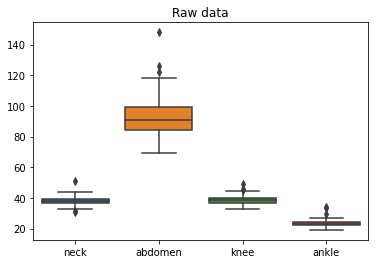

In [259]:
# I am going to center and scale the data. 
# The box plot below shows how the raw data is located.
sns.boxplot(data=bfat)
plt.title("Raw data")
plt.show()

In [260]:
# Now, I am going to scale the values. 
scaler = StandardScaler()
std_bfat = scaler.fit_transform(bfat)

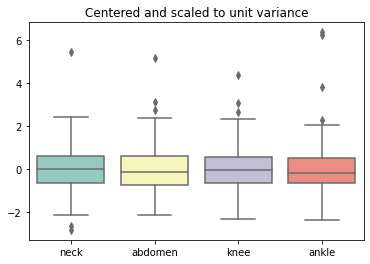

In [261]:
# The box plot shows how the scaled data is lovated.
sns.boxplot(data=pd.DataFrame(std_bfat, columns=bfat.columns, index=bfat.index), palette="Set3")
plt.title("Centered and scaled to unit variance")
plt.show()

In [262]:
# Since the question is just asking for the first two principal components, I am going to create this two.
num_comp = bfat.shape[1]
pca = PCA(n_components=num_comp)
pca.fit(std_bfat)

PCA(n_components=4)

In [263]:
# I am going to create a DataFrame to improve visualization of the PC1 and PC2
col_PCs = ['PC' + str(x) for x in range(1, num_comp+1)]
PCs_bfat = pd.DataFrame(pca.components_.T, columns=col_PCs, index=bfat.columns)

In [264]:
PCs_bfat

,PC1,PC2,PC3,PC4
neck,0.511495,-0.355366,-0.683611,-0.380478
abdomen,0.520551,-0.401773,0.193023,0.728249
knee,0.530718,0.052545,0.662521,-0.525969
ankle,0.430973,0.842337,-0.237663,0.219649


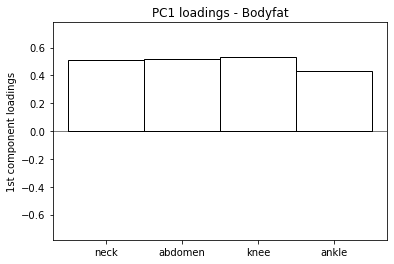

In [265]:
# And we can visualizaed these in bar plots.
negative_data = PCs_bfat.copy()
positive_data = PCs_bfat.copy()

negative_data.loc[negative_data['PC1']>0, 'PC1']=0
positive_data.loc[positive_data['PC1']<0, 'PC1']=0

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(negative_data.index,negative_data['PC1'], width=1, edgecolor='k', color='None')
ax.bar(negative_data.index,positive_data['PC1'], width=1, edgecolor='k', color='None')
plt.axhline(0, color='k', linewidth=0.5)
plt.ylabel("1st component loadings")
plt.ylim(-(positive_data['PC1'].max()+0.25), positive_data['PC1'].max()+0.25)
plt.title("PC1 loadings - Bodyfat")
plt.show()

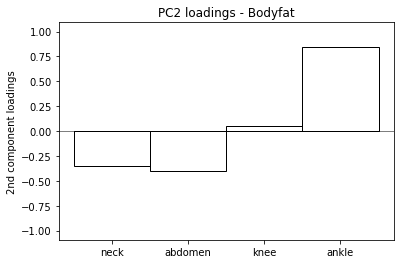

In [266]:
negative_data.loc[negative_data['PC2']>0, 'PC2']=0
positive_data.loc[positive_data['PC2']<0, 'PC2']=0

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(negative_data.index,negative_data['PC2'], width=1, edgecolor='k', color='None')
ax.bar(negative_data.index,positive_data['PC2'], width=1, edgecolor='k', color='None')
plt.axhline(0, color='k', linewidth=0.5)
plt.ylabel("2nd component loadings")
plt.ylim(-(positive_data['PC2'].max()+0.25), positive_data['PC2'].max()+0.25)
plt.title("PC2 loadings - Bodyfat")
plt.show()

In [267]:
PCs_exp_bfat = pd.Series(pca.explained_variance_ratio_, index=col_PCs)

In [268]:
PCs_exp_bfat

PC1    0.716941
PC2    0.155091
PC3    0.075391
PC4    0.052577
dtype: float64

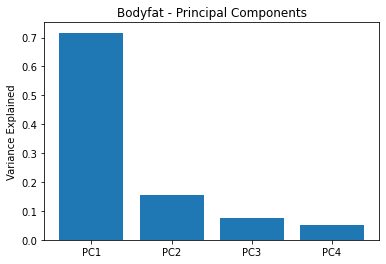

In [269]:
fig, ax = plt.subplots()
plt.bar(PCs_exp_bfat.index, height=PCs_exp_bfat)
plt.title("Bodyfat - Principal Components")
plt.ylabel("Variance Explained")
plt.show()

#### Interpretation of the first Principal Component
As shown in the figure "PC1 loading - Bodyfat" and the table created in step number 77, it seems that all the loading values for the PC1 have roughly the same measure. This means that all of them are individually important and therefore have a highly correlation, they have equal influence. The only thing to stand out is that ankle is 0.10 units below comparing to the other variables.

The first Principal Component explains 71.69% of the variation.

#### Interpretation of the second Principal Component
As shown in the figure "PC2 loading - Bodyfat" and the table created in step number 77, the direction of this PC2 is aligned to the ankle and knee, where ankle has a very high coefficient and knee a small contribution. This could be seen as a upper (abodmen and neck) and lower (ankle and knee) segmentation of the body.

The second Principal Component explains 15.51% of the variation.

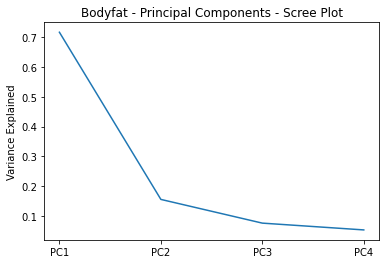

In [270]:
fig, ax = plt.subplots()
ax.plot(PCs_exp_bfat)
plt.title("Bodyfat - Principal Components - Scree Plot")
plt.ylabel("Variance Explained")
plt.show()

As seen in graph below, the "Elbow point" or "blend" in the scree plot indicates is at PC2, which suggests taking PC1 and PC2 would be enough. Looking at the cumulative plot we can see the following:

In [271]:
PCs_expc_bfat = pd.Series(pca.explained_variance_ratio_.cumsum(), index=col_PCs)

In [272]:
PCs_expc_bfat

PC1    0.716941
PC2    0.872032
PC3    0.947423
PC4    1.000000
dtype: float64

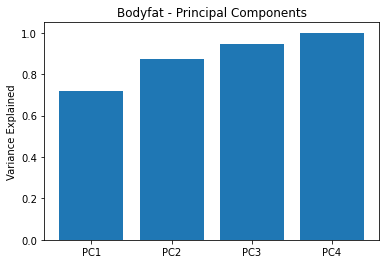

In [273]:
fig, ax = plt.subplots()
plt.bar(PCs_expc_bfat.index, height=PCs_expc_bfat)
plt.title("Bodyfat - Principal Components")
plt.ylabel("Variance Explained")
plt.show()

With PC1 and PC2 together, we explained 87.20% of the variation. Ideally, we would like to explain the variation between 80-90%.

In [274]:
pd.DataFrame(pca.transform(std_bfat), columns=col_PCs)

,PC1,PC2,PC3,PC4
0,-1.324519,-0.089805,0.186761,-0.090881
1,-0.563847,0.402394,-0.711535,-0.405682
2,-0.769920,1.212318,1.000433,0.359919
3,-0.784171,0.137800,-0.256298,-0.081002
4,0.627312,0.774028,2.013062,0.394903
...,...,...,...,...
247,-2.329127,-0.093415,-0.107542,0.499069
248,1.727059,-0.793684,-0.001740,-0.084087
249,0.414967,-1.666360,-0.046111,1.213482
250,1.175423,-0.594118,0.785895,-0.260551


In [275]:
ft_bfat=pd.DataFrame(pca.transform(std_bfat), columns=col_PCs)

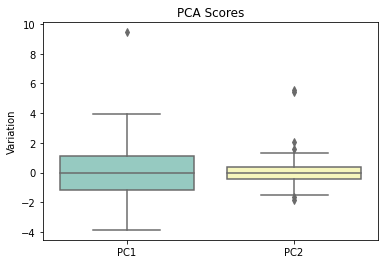

In [276]:
sns.boxplot(data=ft_bfat.iloc[:,:2], palette="Set3")
plt.ylabel("Variation")
plt.title("PCA Scores")
plt.show()

No handles with labels found to put in legend.


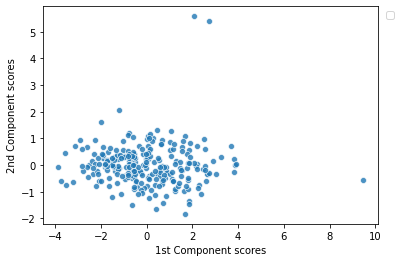

In [307]:
fig, ax = plt.subplots()
sns.scatterplot(x="PC1", y="PC2", data=ft_bfat, alpha=0.8)
plt.ylabel("2nd Component scores")
plt.xlabel("1st Component scores")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

There are roughly eight outliers in PC1 and PC2.

#### Section B
1. Omitting any outliers identified in part a), carry out a principal components analysis of the variables neck, abdomen, knee and ankle. Interpret the first component. What percentage of the variability in the dataset is accounted for by the first component? 
2. Interpret the second component. What percentage of the variability in the dataset is accounted for by the second component?
3. Examine the scree diagram and comment. 
4. Plot the first two components.

In [297]:
bfat_b = pd.concat([bfat, ft_bfat], axis=1)
bfat_b.head()

,neck,abdomen,knee,ankle,PC1,PC2,PC3,PC4
0,36.2,85.2,37.3,21.9,-1.324519,-0.089805,0.186761,-0.090881
1,38.5,83.0,37.3,23.4,-0.563847,0.402394,-0.711535,-0.405682
2,34.0,87.9,38.9,24.0,-0.769920,1.212318,1.000433,0.359919
3,37.4,86.4,37.3,22.8,-0.784171,0.137800,-0.256298,-0.081002
4,34.4,100.0,42.2,24.0,0.627312,0.774028,2.013062,0.394903


In [298]:
index = 0
for c in bfat_b.columns[:2]:
    outliers = [stat for stat in boxplot_stats(bfat_b[c])[0]['fliers']]
    index += len(outliers)
    bfat_b.drop(index=bfat_b[bfat_b[c].isin(outliers)].index.values, inplace=True)
print(str(index)+" outliers removed.")

5 outliers removed.


In [299]:
bfat_b.drop(columns=col_PCs, inplace=True)

In [301]:
bfat_b.head()

,neck,abdomen,knee,ankle
0,36.2,85.2,37.3,21.9
1,38.5,83.0,37.3,23.4
2,34.0,87.9,38.9,24.0
3,37.4,86.4,37.3,22.8
4,34.4,100.0,42.2,24.0


In [302]:
scaler_b = StandardScaler()
std_bfat_b = scaler.fit_transform(bfat_b)

num_comp_b = bfat.shape[1]
pca_b = PCA(n_components=num_comp)
pca_b.fit(std_bfat_b)

col_PCs_b = ['PC' + str(x) for x in range(1, num_comp+1)]
PCs_bfat_b = pd.DataFrame(pca.components_.T, columns=col_PCs_b, index=bfat.columns)

In [303]:
PCs_bfat_b

,PC1,PC2,PC3,PC4
neck,0.511495,-0.355366,-0.683611,-0.380478
abdomen,0.520551,-0.401773,0.193023,0.728249
knee,0.530718,0.052545,0.662521,-0.525969
ankle,0.430973,0.842337,-0.237663,0.219649


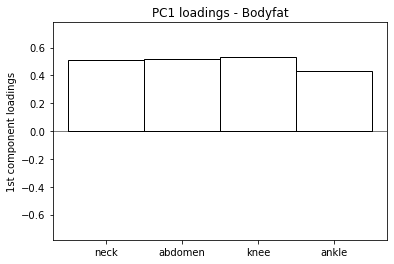

In [304]:
# And we can visualizaed these in bar plots.
negative_data = PCs_bfat_b.copy()
positive_data = PCs_bfat_b.copy()

negative_data.loc[negative_data['PC1']>0, 'PC1']=0
positive_data.loc[positive_data['PC1']<0, 'PC1']=0

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(negative_data.index,negative_data['PC1'], width=1, edgecolor='k', color='None')
ax.bar(negative_data.index,positive_data['PC1'], width=1, edgecolor='k', color='None')
plt.axhline(0, color='k', linewidth=0.5)
plt.ylabel("1st component loadings")
plt.ylim(-(positive_data['PC1'].max()+0.25), positive_data['PC1'].max()+0.25)
plt.title("PC1 loadings - Bodyfat")
plt.show()

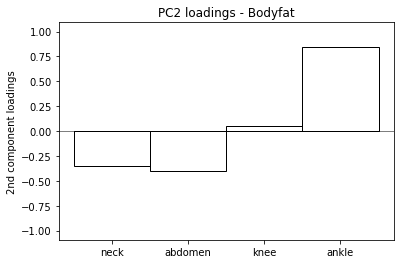

In [305]:
negative_data.loc[negative_data['PC2']>0, 'PC2']=0
positive_data.loc[positive_data['PC2']<0, 'PC2']=0

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(negative_data.index,negative_data['PC2'], width=1, edgecolor='k', color='None')
ax.bar(negative_data.index,positive_data['PC2'], width=1, edgecolor='k', color='None')
plt.axhline(0, color='k', linewidth=0.5)
plt.ylabel("2nd component loadings")
plt.ylim(-(positive_data['PC2'].max()+0.25), positive_data['PC2'].max()+0.25)
plt.title("PC2 loadings - Bodyfat")
plt.show()

In [254]:
ft_bfat_b=pd.DataFrame(pca_b.transform(std_bfat_b), columns=col_PCs)

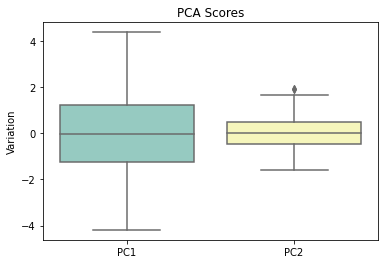

In [256]:
sns.boxplot(data=ft_bfat_b.iloc[:,:2], palette="Set3")
plt.ylabel("Variation")
plt.title("PCA Scores")
plt.show()

No handles with labels found to put in legend.


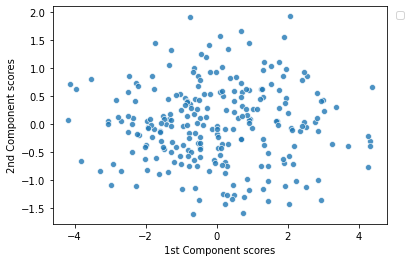

In [308]:
fig, ax = plt.subplots()
sns.scatterplot(x="PC1", y="PC2", data=ft_bfat_b, alpha=0.8)
plt.ylabel("2nd Component scores")
plt.xlabel("1st Component scores")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()